In [1]:
!curl -O https://raw.githubusercontent.com/fastai/fastbook/master/utils.py

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3758  100  3758    0     0  21398      0 --:--:-- --:--:-- --:--:-- 21474


In [2]:
from fastai.vision.all import *

In [3]:
!pip install nbdev graphviz azure

  Using cached azure-5.0.0.zip (4.6 kB)
  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [25 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 35, in <module>
        File "/private/var/folders/8z/s153sms91d73_wc38b7_yl4r0000gn/T/pip-install-kkl1t0_0/azure_1ad481d7931e457aa3ae59a35ff19a73/setup.py", line 60, in <module>
          raise RuntimeError(message)
      RuntimeError:
      
      Starting with v5.0.0, the 'azure' meta-package is deprecated and cannot be installed anymore.
      Please install the service specific packages prefixed by `azure` needed for your application.
      
      The complete list of available packages can be found at:
      https://aka.ms/azsdk/python/all
      
      Here's a non-exhaustive list of common packages:
      
      -  azure-mgmt-comput

In [162]:
import matplotlib.pyplot as plt

def plot_function(f, x_label='x', y_label='f(x)', label=None, title=None, min=-2, max=2):
    x = torch.linspace(min,max, steps=100)
    y = f(x)
    plt.plot(x, y, label=label)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    if label: plt.legend()
    if title: plt.title(title)
    plt.grid(True)
    #plt.show()

In [5]:
matplotlib.rc('image', cmap='Greys')

In [6]:
path = untar_data(URLs.MNIST_SAMPLE)
Path.BASE_PATH = path

In [7]:
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()
threes

(#6131) [Path('train/3/10.png'),Path('train/3/10000.png'),Path('train/3/10011.png'),Path('train/3/10031.png'),Path('train/3/10034.png'),Path('train/3/10042.png'),Path('train/3/10052.png'),Path('train/3/1007.png'),Path('train/3/10074.png'),Path('train/3/10091.png'),Path('train/3/10093.png'),Path('train/3/10097.png'),Path('train/3/10099.png'),Path('train/3/10116.png'),Path('train/3/10125.png'),Path('train/3/10137.png'),Path('train/3/10141.png'),Path('train/3/10144.png'),Path('train/3/10155.png'),Path('train/3/10161.png')...]

In [8]:
im3_path = threes[3]
im3 = Image.open(im3_path)
im3

In [9]:
array(im3)[4:10, 4:10]

array([[  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 178],
       [  0,   0,   0,   0,   0, 186],
       [  0,   0,   0,   0,   0, 186],
       [  0,   0,   0,   0,   0,  39]], dtype=uint8)

In [10]:
tensor(im3)[4:10, 6:12]

tensor([[  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0, 104, 253],
        [  0,   0,   0, 178, 248, 252],
        [  0,   0,   0, 186, 252, 252],
        [  0,   0,   0, 186, 252, 243],
        [  0,   0,   0,  39,  53,  47]], dtype=torch.uint8)

In [11]:
im3_t = tensor(im3)
df = pd.DataFrame(im3_t[4:15,4:22])
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,104,253,253,253,255,253,253,253,218,32,0,0
2,0,0,0,0,0,178,248,252,252,252,253,252,252,252,252,215,34,0
3,0,0,0,0,0,186,252,252,252,252,253,252,252,252,252,252,79,0
4,0,0,0,0,0,186,252,243,172,172,39,39,39,219,252,252,79,0
5,0,0,0,0,0,39,53,47,0,0,0,29,117,244,252,252,79,0
6,0,0,0,0,0,0,0,0,0,0,54,208,252,252,252,184,21,0
7,0,0,0,0,0,0,0,0,3,41,253,252,252,252,206,21,0,0
8,0,0,0,0,0,0,5,41,165,252,253,252,252,252,227,131,9,0
9,0,0,0,0,0,109,163,252,252,252,253,252,252,252,252,252,156,0


In [12]:
seven_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]
len(three_tensors),len(seven_tensors)

(6131, 6265)

<Axes: >

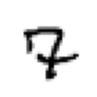

In [13]:
show_image(seven_tensors[2])

In [14]:
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255
stacked_threes.shape

torch.Size([6131, 28, 28])

In [15]:
len(stacked_threes.shape)

3

In [16]:
stacked_threes.ndim

3

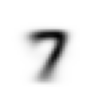

In [17]:
mean7 = stacked_sevens.mean(0)
show_image(mean7);

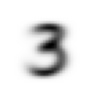

In [18]:
mean3 = stacked_threes.mean(0)
show_image(mean3);

<Axes: >

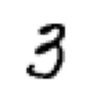

In [19]:
test_image = three_tensors[10].float() / 255
show_image(test_image)

<Axes: >

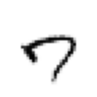

In [20]:
test_image2 = seven_tensors[25].float() / 255
show_image(test_image2)

Predicted digit: 3 | 0.11002060770988464 | 0.15563826262950897
Predicted digit: 7 | 0.17717096209526062 | 0.15721683204174042
True


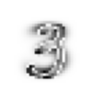

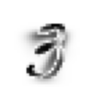

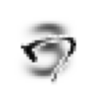

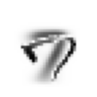

In [21]:
## Define a pixel-wise similarity function
def pixel_similarity(img1, img2):
    # Score per pixel: 1 - abs difference
    pixel_scores = (img1 - img2).abs()
    return pixel_scores 

# Compute similarity to each class
score3 = pixel_similarity(test_image, mean3)
score7 = pixel_similarity(test_image, mean7)
show_image(score3)
show_image(score7)

# Prediction
predicted_label = 3 if score3.mean() < score7.mean() else 7
print(f"Predicted digit: {predicted_label} | {score3.mean()} | {score7.mean()}")

# Compute similarity to each class
score3 = pixel_similarity(test_image2, mean3)
score7 = pixel_similarity(test_image2, mean7)
show_image(score3)
show_image(score7)

# Prediction
predicted_label2 = 3 if score3.mean() < score7.mean() else 7
print(f"Predicted digit: {predicted_label2} | {score3.mean()} | {score7.mean()}") 
print(torch.backends.mps.is_available()) # Metal Performance Shaders

In [22]:
dist_3_abs = (test_image - mean3).abs().mean()
dist_3_sqr = ((test_image - mean3)**2).mean().sqrt()

dist_7_abs = (test_image - mean7).abs().mean()
dist_7_sqr = ((test_image - mean7)**2).mean().sqrt()

print(f"dist_3: {dist_3_abs} | {dist_3_sqr}")
print(f"dist_7: {dist_7_abs} | {dist_7_sqr}")

dist_3: 0.11002060770988464 | 0.20178648829460144
dist_7: 0.15563826262950897 | 0.29894086718559265


In [23]:
F.l1_loss(test_image.float(), mean3), F.mse_loss(test_image, mean3).sqrt()

(tensor(0.1100), tensor(0.2018))

In [24]:
F.l1_loss(test_image.float(), mean7), F.mse_loss(test_image, mean7).sqrt()

(tensor(0.1556), tensor(0.2989))

In [25]:
muhTensor = tensor([1,2,3],
                   [4,5,6])
print(f" {muhTensor[1]} | {muhTensor[:,2]}")

 tensor([4, 5, 6]) | tensor([3, 6])


In [26]:
print(Path.BASE_PATH)

/Users/vadstart/.fastai/data/mnist_sample


In [27]:
valid_3_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'valid'/'3').ls()])
valid_3_tens = valid_3_tens.float()/255
valid_7_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'valid'/'7').ls()])
valid_7_tens = valid_7_tens.float()/255
valid_3_tens.shape,valid_7_tens.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

In [28]:
def mnist_distance(a,b): return (a-b).abs().mean((-1, -2))
valid_3_dist = mnist_distance(valid_3_tens, mean3)
valid_3_dist, valid_3_dist.shape, (valid_3_tens - mean3).shape, valid_3_tens.shape, mean3.shape, 

(tensor([0.1634, 0.1145, 0.1363,  ..., 0.1105, 0.1111, 0.1640]),
 torch.Size([1010]),
 torch.Size([1010, 28, 28]),
 torch.Size([1010, 28, 28]),
 torch.Size([28, 28]))

In [29]:
def is_3(x):
    return mnist_distance(x, mean3) < mnist_distance(x, mean7)
is_3(test_image), is_3(test_image).float(), is_3(valid_3_tens).float().mean()

(tensor(True), tensor(1.), tensor(0.9168))

In [30]:
accuracy_3s = is_3 (valid_3_tens).float().mean()
accuracy_7s = (1 - is_3 (valid_7_tens).float()).mean()
accuracy_3s, accuracy_7s, (accuracy_3s + accuracy_7s)/2

(tensor(0.9168), tensor(0.9854), tensor(0.9511))

In [31]:
a = tensor([1.1,2.2], 
            [3.3,4.4])
b = tensor([4.5,7.4], 
            [1.8,2.9])
c = (a-b)
c.abs()

tensor([[3.4000, 5.2000],
        [1.5000, 1.5000]])

In [32]:
def pr_8(x, w):
    return (x * w).sum()

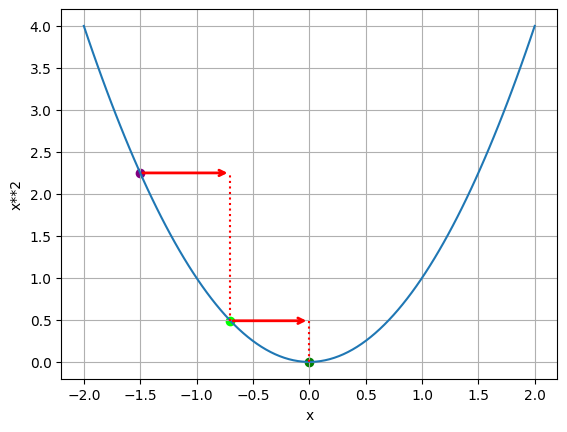

In [33]:
def f(x): 
    return x**2
plot_function(f, 'x', 'x**2')
plt.scatter(-1.5, f(-1.5), color='purple');
plt.scatter(-0.7, f(-0.7), color='lime');
plt.scatter(0.0, f(0.0), color='green');

plt.annotate(
    '', xy=(-0.7, f(-1.5)), xytext=(-1.5, f(-1.5)),
    arrowprops=dict(arrowstyle='->', color='red', lw=2)
)
plt.plot([-0.7, -0.7], [f(-0.7), f(-1.5)], linestyle=':', color='red') 
plt.annotate(
    '', xy=(0.0, f(-0.7)), xytext=(-0.7, f(-0.7)),
    arrowprops=dict(arrowstyle='->', color='red', lw=2)
)
plt.plot([0.0, 0.0], [f(-0.7), f(0.0)], linestyle=':', color='red') 
#plt.axvline(x=-1.5, linestyle=':', color='gray') 


In [34]:
xt = tensor(3.).requires_grad_()
yt = f(xt)
yt

tensor(9., grad_fn=<PowBackward0>)

In [35]:
yt.backward()

In [36]:
xt.grad

tensor(6.)

In [37]:
xt = tensor ([3., 4., 10.]).requires_grad_()
xt

tensor([ 3.,  4., 10.], requires_grad=True)

In [38]:
def f(x): 
    return (x**2).sum()

yt = f(xt)
yt

tensor(125., grad_fn=<SumBackward0>)

In [39]:
yt.backward()
xt.grad

tensor([ 6.,  8., 20.])

In [40]:
time = torch.arange(0,20).float(); 
time

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19.])

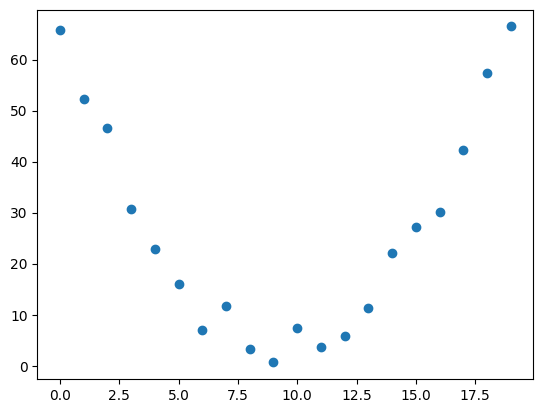

In [41]:
speed = torch.randn(20) * 3 + 0.75 * (time - 9.5) ** 2 + 1
plt.scatter(time, speed)

In [42]:
# Separate params from t to form a quadratic function
def f(t, params):
    a, b, c = params
    return a * (t ** 2) + (b * t) + c

In [43]:
# Loss function
#    - mean squared error
def mse(preds, targets):
    return ((preds - targets) ** 2).mean()

In [44]:
# STEP 1: Initialize the parameters
params = torch.randn(3).requires_grad_()
orig_params = params.clone()

In [45]:
# STEP 2: Calculate the predictions
preds = f(time, params)

In [46]:
def show_preds(preds, ax = None):
    if ax is None: ax = plt.subplots()[1]
    ax.scatter (time, speed)
    ax.scatter (time, to_np(preds), color = 'red')
    ax.set_ylim(-300, 100)

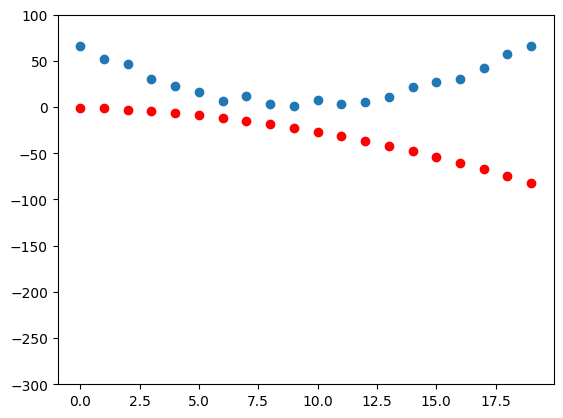

In [47]:
show_preds(preds)

In [48]:
# STEP 3: Calculate the loss
loss = mse(preds, speed)
loss

tensor(4624.4009, grad_fn=<MeanBackward0>)

In [49]:
# STEP 4: Calculate the gradients
loss.backward()
params.grad

tensor([-21252.6855,  -1378.4681,   -114.2912])

In [50]:
params.grad * 1e-5

tensor([-0.2125, -0.0138, -0.0011])

In [51]:
params

tensor([-0.1907, -0.6730, -0.6703], requires_grad=True)

In [52]:
# STEP 5: Step the weights
lr = 1e-5
params.data -= lr * params.grad.data
params.grad = None

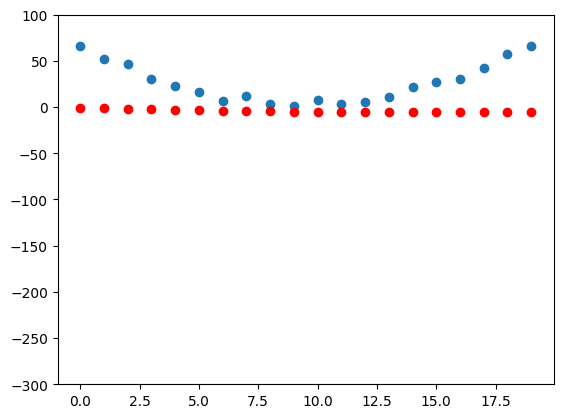

In [53]:
preds = f(time, params)
mse(preds, speed)
show_preds(preds)

In [54]:
def apply_step(params, prn=True):
    preds = f(time, params)
    loss = mse(preds, speed)
    loss.backward()
    params.data -= lr * params.grad.data
    params.grad = None
    if prn: 
        print(loss.item())
    return preds

In [55]:
for i in range(10): apply_step(params)

1369.877197265625
754.0166015625
637.4716796875
615.41259765625
611.2330322265625
610.4369506835938
610.2810668945312
610.2463989257812
610.234375
610.22705078125


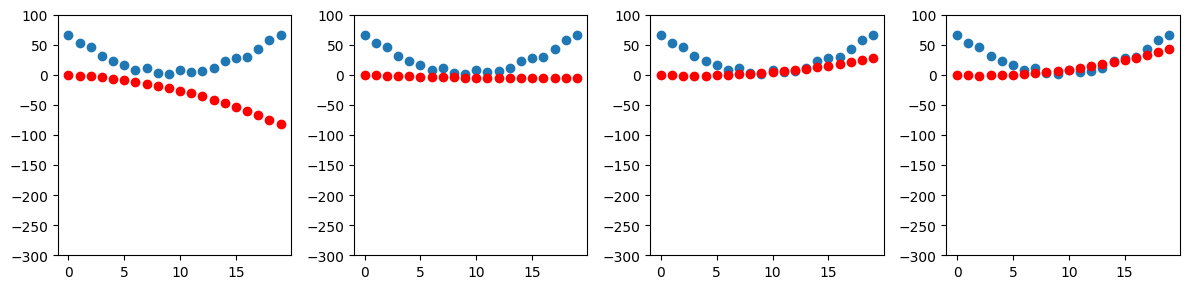

In [56]:
params = orig_params.detach().requires_grad_()
_,axs = plt.subplots(1,4,figsize=(12,3))
for ax in axs: show_preds(apply_step(params, False), ax)
plt.tight_layout()

In [57]:
# Step 7: stop

In [327]:
# -------------------------
# The MNIST Loss Function
# -------------------------
# Images with pixel ratings, flattened
train_x = torch.cat([stacked_threes, stacked_sevens]).view(-1, 28*28)

In [328]:
# Images with labels (0 for 7s, 1 for 3s)
train_y = tensor([1] * len(threes) + [0] * len(sevens)).unsqueeze(1)
train_x.shape, train_y.shape

(torch.Size([12396, 784]), torch.Size([12396, 1]))

In [329]:
dset = list(zip(train_x, train_y))
x, y = dset[0]
x.shape, y

(torch.Size([784]), tensor([1]))

In [330]:
valid_x = torch.cat([valid_3_tens, valid_7_tens]).view(-1, 28*28)
valid_y = tensor([1]*len(valid_3_tens) + [0]*len(valid_7_tens)).unsqueeze(1)
valid_dset = list(zip(valid_x,valid_y))

In [125]:
def init_params(size, std = 1.0):
    return (torch.randn(size) * std).requires_grad_()

In [127]:
weights = init_params((28*28, 1))
weights[0]

tensor([-0.3978], grad_fn=<SelectBackward0>)

In [111]:
bias = init_params(1)

In [130]:
(train_x[0] * weights.T).sum() + bias

tensor([-5.0528], grad_fn=<AddBackward0>)

In [132]:
def linear1(xb):
    return xb@weights + bias
preds = linear1(train_x)
preds.shape, preds

(torch.Size([12396, 1]),
 tensor([[-5.0528],
         [-2.9452],
         [-6.9087],
         ...,
         [-0.3077],
         [-3.6177],
         [-4.5733]], grad_fn=<AddBackward0>))

In [133]:
corrects = (preds > 0.0).float() == train_y
corrects

tensor([[False],
        [False],
        [False],
        ...,
        [ True],
        [ True],
        [ True]])

In [135]:
corrects.float().mean().item()

0.5435624122619629

In [139]:
with torch.no_grad(): weights[0] *= 2.001
preds = linear1(train_x)
((preds > 0.0).float() == train_y).float().mean().item()

0.5435624122619629

In [156]:
if torch.backends.mps.is_available():
    device = torch.device("mps")
else:
    device = torch.device("cpu")

trgts = tensor([1, 0, 1])
prds = tensor([0.45, 0.1, 0.21])

trgts = trgts.to(device)
prds  = prds.to(device)

In [340]:
def mnist_loss (predictions, targets):
    predictions = predictions.sigmoid()
    return torch.where (targets == 1, 1 - predictions, predictions).mean()

In [157]:
torch.where (trgts==1, 1-prds, prds)

tensor([0.5500, 0.1000, 0.7900], device='mps:0')

In [158]:
mnist_loss( prds, trgts )

tensor(0.4800, device='mps:0')

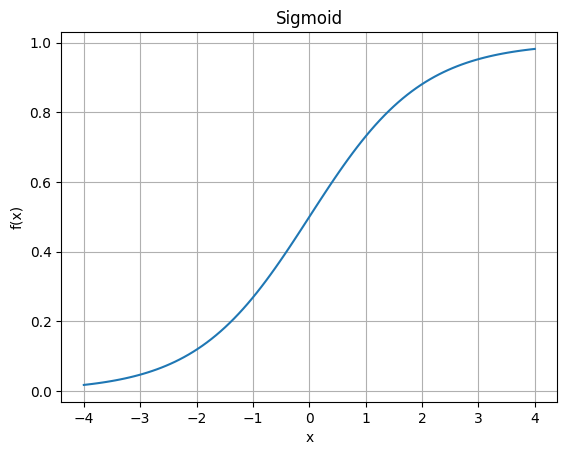

In [163]:
# def sigmoid(x): 
#     return 1/(1+torch.exp(-x))
plot_function(torch.sigmoid, title='Sigmoid', min=-4, max=4)

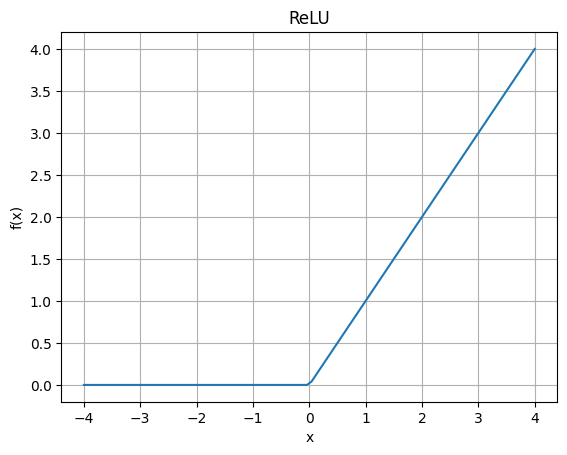

In [164]:
plot_function(torch.relu, title='ReLU', min=-4, max=4)

In [171]:
# OPTIMIZATION step
#torch.utils.data.DataLoader
coll = range(15)
dl = DataLoader(coll, batch_size=5, shuffle = True)
list(dl)

[tensor([ 8,  5, 11,  4, 13]),
 tensor([ 3,  2,  0, 12,  6]),
 tensor([ 1,  7, 10, 14,  9])]

In [172]:
ds = L(enumerate(string.ascii_lowercase))
ds

(#26) [(0, 'a'),(1, 'b'),(2, 'c'),(3, 'd'),(4, 'e'),(5, 'f'),(6, 'g'),(7, 'h'),(8, 'i'),(9, 'j'),(10, 'k'),(11, 'l'),(12, 'm'),(13, 'n'),(14, 'o'),(15, 'p'),(16, 'q'),(17, 'r'),(18, 's'),(19, 't')...]

In [173]:
dl = DataLoader(ds, batch_size = 6, shuffle = True)
list(dl)

[(tensor([20,  5,  7,  9,  0, 22]), ('u', 'f', 'h', 'j', 'a', 'w')),
 (tensor([10, 13, 19,  2,  1, 11]), ('k', 'n', 't', 'c', 'b', 'l')),
 (tensor([ 8, 24, 14, 21,  4,  3]), ('i', 'y', 'o', 'v', 'e', 'd')),
 (tensor([15, 12, 17, 16, 23,  6]), ('p', 'm', 'r', 'q', 'x', 'g')),
 (tensor([25, 18]), ('z', 's'))]

In [ ]:
for x, y in dl:
    pred = model(x)
    loss = loss_func(pred, y)
    loss.backward()
    parameters -= parameters.grad * lr

In [174]:
# Re-initialize the parameters
weights = init_params((28*28, 1))
bias = init_params(1)

In [331]:
dl = DataLoader(dset, batch_size = 256)
xb, yb = first(dl)
xb.shape, yb.shape

(torch.Size([256, 784]), torch.Size([256, 1]))

In [332]:
valid_dl = DataLoader(valid_dset, batch_size = 256)

In [192]:
# Grab a test mini-batch
batch = train_x[:4]
batch.shape

torch.Size([4, 784])

In [193]:
preds = linear1(batch)
preds

tensor([[-0.1943],
        [ 7.7124],
        [-8.6659],
        [-9.6444]], grad_fn=<AddBackward0>)

In [182]:
loss = mnist_loss(preds, train_y[:4], "sigm")
loss

tensor(0.6372, grad_fn=<MeanBackward0>)

In [183]:
loss.backward()
weights.grad.shape, weights.grad.mean(), bias.grad

(torch.Size([784, 1]), tensor(-0.0089), tensor([-0.0621]))

In [359]:
def calc_grad(xb, yb, model):
    weights.grad.zero_()
    bias.grad.zero_();
    
    preds = model(xb)
    preds.to(device)
    loss = mnist_loss(preds, yb)
    loss.to(device)
    loss.backward()

In [205]:
calc_grad(batch, train_y[:4], linear1)
weights.grad.mean(), bias.grad

(tensor(-0.0089), tensor([-0.0621]))

In [217]:
def train_epoch(model, lr, params):
    for xb,yb in dl:
        calc_grad(xb, yb, model)
        for p in params:
            p.data -= p.grad * lr # If we assign to the data attribute of a tensor then PyTorch will not take the gradient of that step. 
            p.grad.zero_()

In [208]:
(preds>0.0).float() == train_y[:4]

tensor([[False],
        [ True],
        [False],
        [False]])

In [345]:
def batch_accuracy(xb, yb):
    preds = xb.sigmoid()
    correct = (preds > 0.5) == yb
    return correct.float().mean()

In [210]:
batch_accuracy(linear1(batch), train_y[:4])

tensor(0.2500)

In [357]:
def validate_epoch(model):
    accs = [batch_accuracy(model(xb), yb) for xb, yb in valid_dl]
    return round(torch.stack(accs).mean().item(), 4)

In [214]:
validate_epoch(linear1)

0.6249

In [222]:
lr = 1.
params = weights, bias
train_epoch(linear1, lr, params)
validate_epoch(linear1)

0.703

In [223]:
for i in range(20):
    train_epoch(linear1, lr, params)
    print(validate_epoch(linear1), end=' ')

0.8641 0.9208 0.9403 0.9525 0.9584 0.9628 0.9637 0.9657 0.9662 0.9671 0.9691 0.9701 0.9706 0.9711 0.9721 0.9716 0.9735 0.9735 0.9745 0.9755 

In [224]:
linear_model = nn.Linear(28 * 28, 1)

In [225]:
w, b = linear_model.parameters()
w.shape, b.shape

(torch.Size([1, 784]), torch.Size([1]))

In [226]:
class BasicOptim:
    def __init__(self, params, lr): self.params, self.lr = list(params), lr

    def step(self, *args, **kwargs):
        for p in self.params: p.data -= p.grad.data * self.lr

    def zero_grad(self, *args, **kwargs):
        for p in self.params: p.grad = None

In [227]:
opt = BasicOptim(linear_model.parameters(), lr)

In [228]:
def train_epoch(model):
    for xb, yb in dl:
        calc_grad(xb, yb, model)
        opt.step()
        opt.zero_grad()

In [229]:
validate_epoch(linear_model)

0.4341

In [355]:
def train_model(model, epochs):
    for i in range(epochs):
        train_epoch(model)
        print(validate_epoch(model), end=' ')

In [231]:
train_model(linear_model, 20)

0.4932 0.7607 0.855 0.916 0.935 0.9502 0.9555 0.9634 0.9658 0.9673 0.9687 0.9717 0.9736 0.9741 0.9761 0.977 0.9775 0.9775 0.9785 0.9785 

In [377]:
linear_model == nn.Linear(28*28, 1)
opt = SGD(linear_model.parameters(), lr)
train_model(linear_model, 20)

0.9819 0.9824 0.9824 0.9824 0.9829 0.9834 0.9834 0.9838 0.9838 0.9838 0.9838 0.9838 0.9838 0.9843 0.9843 0.9843 0.9843 0.9843 0.9843 0.9843 

In [378]:
dls = DataLoaders(dl, valid_dl)

In [379]:
learn = Learner(dls, nn.Linear(28 * 28, 1), opt_func = SGD,
                loss_func = mnist_loss, metrics = batch_accuracy)

In [380]:
learn.fit(10, .1)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.218104,0.372347,0.535819,00:00
1,0.121824,0.185109,0.868989,00:00
2,0.083600,0.108291,0.935231,00:00
3,0.065388,0.080417,0.954367,00:00
4,0.055581,0.066881,0.963199,00:00
5,0.049680,0.058964,0.964671,00:00
6,0.045749,0.053758,0.966143,00:00
7,0.042900,0.050053,0.967125,00:00
8,0.040699,0.047265,0.969087,00:00
9,0.038918,0.045080,0.969578,00:00


In [242]:
#def simple_net(xb):
#    res = xb@w1 + b1 # Linear Layer
#    res = res.max(tensor(0.0)) # Nonlinearity / Activation Function; Rectified linear unit (ReLU)
#    res = res@w2 + b2 # Linear Layer
#    return res

0.9695780277252197

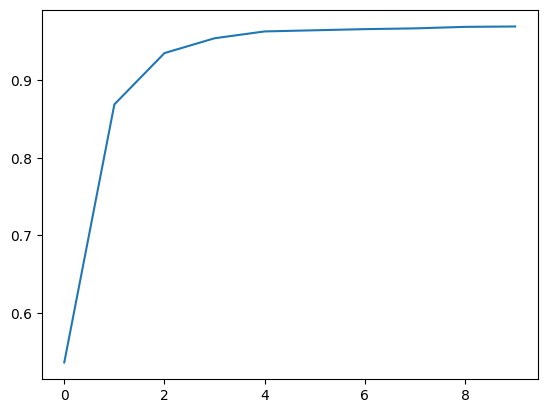

In [381]:
plt.plot(L(learn.recorder.values).itemgot(2));
learn.recorder.values[-1][2]

In [372]:
simple_net = nn.Sequential(
    nn.Linear(28 * 28, 30),
    nn.ReLU(),
    nn.Linear(30, 1)
)

In [373]:
learn = Learner(dls, simple_net, opt_func = SGD,
                loss_func = mnist_loss, metrics = batch_accuracy)

In [374]:
learn.fit(20, 0.1)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.278420,0.411867,0.504907,00:00
1,0.134109,0.209757,0.824828,00:00
2,0.075745,0.107889,0.923454,00:00
3,0.050827,0.074179,0.944063,00:00
4,0.039129,0.058477,0.960746,00:00
5,0.033064,0.049599,0.964671,00:00
6,0.029524,0.043993,0.965653,00:00
7,0.027194,0.040141,0.967615,00:00
8,0.025496,0.037331,0.969087,00:00
9,0.024172,0.035178,0.972031,00:00


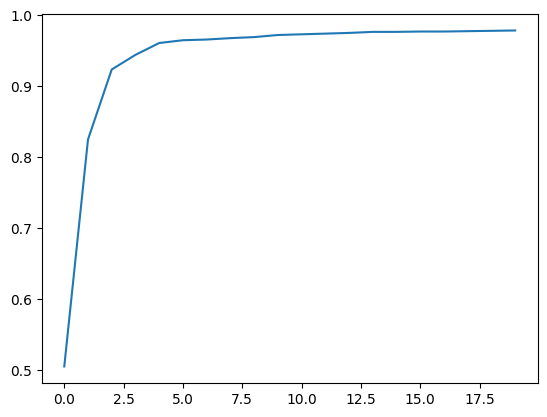

In [375]:
plt.plot(L(learn.recorder.values).itemgot(2));

In [376]:
learn.recorder.values[-1][2]

0.9784101843833923

In [248]:
dls = ImageDataLoaders.from_folder(path)
learn = vision_learner(dls, resnet18, pretrained = False,
                       loss_func = F.cross_entropy, metrics = accuracy)
learn.fit_one_cycle(1, 0.1)

epoch,train_loss,valid_loss,accuracy,time
0,0.072619,0.012108,0.995093,00:12
